<a href="https://colab.research.google.com/github/NeatyNut/AIFFEL_Online_Quest/blob/main/Node10_Project/MachineLearning/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%85%B8%EB%93%9C10_Quest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 에어엔비엔비 자료를 토대로 Price 추정 머신러닝 모델 생성하기

* 개인 깃에 저장한 뒤 각 데이터를 읽습니다.
# 데이터 전처리를 진행하겠습니다.

In [ ]:
import pandas as pd

train = pd.read_csv("https://raw.githubusercontent.com/NeatyNut/AIFFEL_Online_Quest/main/Node10_Project/MachineLearning/Data/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/NeatyNut/AIFFEL_Online_Quest/main/Node10_Project/MachineLearning/Data/test.csv")
y_test = pd.read_csv("https://raw.githubusercontent.com/NeatyNut/AIFFEL_Online_Quest/main/Node10_Project/MachineLearning/Data/y_test.csv")

In [ ]:
# 데이터 모양 확인
train.shape, test.shape, y_test.shape

((39116, 16), (9779, 15), (9779, 1))

* train세트와 test세트의 컬럼 개수가 16개, 15개로 다른 것을 확인할 수 있습니다.

In [ ]:
for i in train.columns :
  if i not in test.columns :
    print(i)

price


* 반복문으로 train에 price 컬럼이 한개 더 있음을 확인할 수 있었습니다.

In [ ]:
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


* 디스플레이 함수를 통해서도 확인 가능합니다.
* 그렇다면 price데이터를 y_train으로 할당하고 train데이터에서는 삭제하겠습니다.

In [ ]:
y_train = train[["price"]]
train = train.drop("price", axis=1)

* y_train에 잘 들어와있는지, train은 컬럼수가 줄었는 지 확인합니다.

In [ ]:
print(y_train.head(2))
print()
print(train.shape)

   price
0     70
1    240

(39116, 15)


* 이제 학습 데이터의 결측치를 확인해보겠습니다.

In [ ]:
print(y_train.isnull().sum())
print("="*50)
print(train.isnull().sum())
print("="*50)
print(y_test.isnull().sum())
print("="*50)
print(test.isnull().sum())

price    0
dtype: int64
id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64
price    0
dtype: int64
id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
min

* train과 test의 last_review와 reviews_per_month 데이터에서 결측치가 발견되어
  last_review는 제거하고 reviews_per_month 데이터의 결측 원인을 확인해보겠습니다.

In [ ]:
train = train.drop("last_review", axis=1)
test = test.drop("last_review", axis=1)

# reviews_per_month 결측치행 조회 조건 생성
cond1 = train['reviews_per_month'].isnull()
cond2 = test['reviews_per_month'].isnull()

In [ ]:
display(train[cond1].head(3))
print()
print("train값의 reviews_per_month 결측치행의 총 리뷰 수", train.loc[cond1, 'number_of_reviews'].sum())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,28,0,NaN,1,0
23,36421786,Luxury | Private room |Balcony|Parking included,211500809,Stefania,Queens,Jackson Heights,40.74765,-73.89445,Private room,2,0,NaN,1,85
27,19544766,Large+Amazing 2BR ( Flex)-Upper East Side-E89th,2856748,Ruchi,Manhattan,Upper East Side,40.77608,-73.94364,Entire home/apt,30,0,NaN,49,325



train값의 reviews_per_month 결측치행의 총 리뷰 수 0


In [ ]:
display(test[cond2].head(3))
print()
print("test값의 reviews_per_month 결측치행의 총 리뷰 수", test.loc[cond2, 'number_of_reviews'].sum())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
10,23322795,San Carlos Hotel Garden Terrace Penthouse- up ...,173685298,Janet,Manhattan,Midtown,40.75664,-73.97191,Private room,1,0,NaN,11,179
13,11972141,Lovely Room in Beautiful Brooklyn,54043278,Marina,Brooklyn,Bedford-Stuyvesant,40.68583,-73.95677,Private room,3,0,NaN,1,0
14,36035142,"Large 1 Bedroom Apartment, Steps to Central Pa...",263336381,Tanya,Manhattan,Upper West Side,40.78360,-73.97511,Entire home/apt,30,0,NaN,1,44



test값의 reviews_per_month 결측치행의 총 리뷰 수 0


* 즉, reviews_per_month의 결측치 이유는 총 리뷰 수가 0개 였기에 나타나는 문제입니다. 총 리뷰 수가 0개일때 당연히 reviews_per_month가 0이 되기에 0을 채워줍니다.

In [ ]:
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)
print(train.isnull().sum())
print()
print(test.isnull().sum())

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0


* name과 host_name 외에는 없는 것으로 파악됩니다. 이제 수치형 데이터와 문자형 데이터를 구분해보도록 하겠습니다.

In [ ]:
train_float = train.select_dtypes(exclude='object')
test_float = test.select_dtypes(exclude='object')
train_string = train.select_dtypes(include='object')
test_string = test.select_dtypes(include='object')

train_float.shape, train_string.shape, test_float.shape, test_string.shape

((39116, 9), (39116, 5), (9779, 9), (9779, 5))

* 9개의 수치형 데이터와 5개의 문자형 데이터로 구분된 것을 확인할 수 있습니다.

```
# 코드로 형식 지정됨
```



In [ ]:
# 지수표현 수정
pd.options.display.float_format = '{:.5f}'.format
display(train_float.max()-train_float.min())
display(test_float.max()-test_float.min())

id                                36483070.00000
host_id                          274318875.00000
latitude                                 0.41255
longitude                                0.53143
minimum_nights                        1249.00000
number_of_reviews                      629.00000
reviews_per_month                       58.50000
calculated_host_listings_count         326.00000
availability_365                       365.00000
dtype: float64

id                                36483598.00000
host_id                          274308674.00000
latitude                                 0.40598
longitude                                0.52595
minimum_nights                         999.00000
number_of_reviews                      597.00000
reviews_per_month                       19.75000
calculated_host_listings_count         326.00000
availability_365                       365.00000
dtype: float64

* 숫자간에 어마어마한차이가 보이기에 MinMaxScaler를 진행하고 id와 host_id는 쓸모 없다고 생각되어 지우겠다.

In [ ]:
# 변수 삭제
train_float = train_float.drop(["id", "host_id"], axis=1)
test_float = test_float.drop(["id", "host_id"], axis=1)

# 컬럼명 저장
col_names = train_float.columns

# RobustScaler로 정리
from sklearn.preprocessing import RobustScaler
RSSC = RobustScaler()
train_float = RSSC.fit_transform(train_float)
test_float = RSSC.fit_transform(test_float)

# 데이터 프레임화
train_float = pd.DataFrame(data=train_float, columns=col_names)
test_float = pd.DataFrame(data=test_float, columns=col_names)

# 재 조회
display(train_float.max()-train_float.min())
display(test_float.max()-test_float.min())

latitude                           5.65873
longitude                         11.34262
minimum_nights                   312.25000
number_of_reviews                 28.59091
reviews_per_month                 37.74194
calculated_host_listings_count   326.00000
availability_365                   1.60088
dtype: float64

latitude                           5.51978
longitude                         11.31075
minimum_nights                   249.75000
number_of_reviews                 25.95652
reviews_per_month                 12.99342
calculated_host_listings_count   326.00000
availability_365                   1.64414
dtype: float64

* 그리고 문자형 데이터도 변환해보겠다.
  * 유니크 값이 너무 많은 것들은 제외하겠다.
  * get_dummies를 써서 원핫인코딩을 쉽게 진행하겠다.
  * 단, 이때, train과 test를 합쳐 동시에 진행하여야 컬럼의 축이 알맞게 적용된다.

In [ ]:
display(train_string.describe())
display(test_string.describe())

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,39104,39099,39116,39116,39116
unique,38420,9977,5,221,3
top,Home away from home,Michael,Manhattan,Williamsburg,Entire home/apt
freq,15,338,17331,3099,20299


,name,host_name,neighbourhood_group,neighbourhood,room_type
count,9775,9775,9779,9779,9779
unique,9719,4066,5,192,3
top,Loft Suite @ The Box House Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,5,79,4330,821,5110


* name과 host_name은 제거하기로 결정한다

In [ ]:
train_string = train_string.iloc[:,2:]
test_string = test_string.iloc[:,2:]

In [ ]:
train_row = train_string.shape[0]
string = pd.concat([train_string, test_string])
string = pd.get_dummies(string)
string.head(2)

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
train_string = string[:train_row]
test_string = string[train_row:]

train_string.shape, test_string.shape

((39116, 229), (9779, 229))


* 동일하게 229개의 컬럼을 가지는 것을 확인할 수 있었다.

## 서포터 벡터 머신을 활용해 229개에서 3개의 축으로 차원축소

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3)
train_string = svd.fit_transform(train_string)
train_string = pd.DataFrame(train_string)

test_string = svd.fit_transform(test_string)
test_string = pd.DataFrame(test_string)

In [ ]:
train_string = train_string.rename(columns={0:"레이블1", 1:"레이블2", 2:"레이블3"})
test_string = test_string.rename(columns={0:"레이블1", 1:"레이블2", 2:"레이블3"})
train_string.shape, test_string.shape

((39116, 3), (9779, 3))

## 이제 수치형 데이터와 문자형 데이터를 합쳐서 x_train, x_test 데이터를 생성

In [ ]:
# 옆으로 합치
x_train = pd.concat([train_float, train_string], axis=1)
x_test = pd.concat([test_float, test_string], axis=1)

x_train.shape, x_test.shape

((39116, 10), (9779, 10))

In [ ]:
# 문자열 데이터는 더이상 없다
display(x_train.select_dtypes(include='object').head(2))
display(x_test.select_dtypes(include='object').head(2))

""
0
1


""
0
1


*

array([[<Axes: title={'center': 'price'}>]], dtype=object)

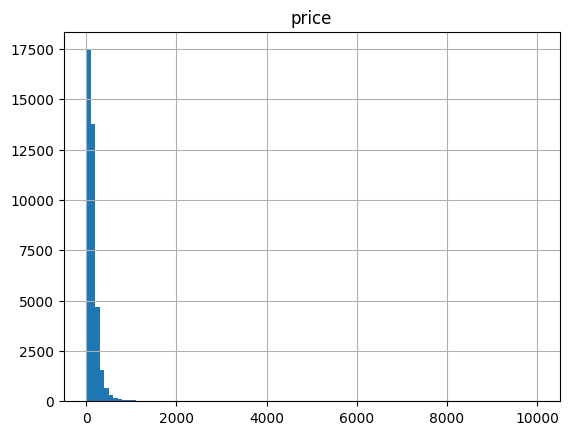

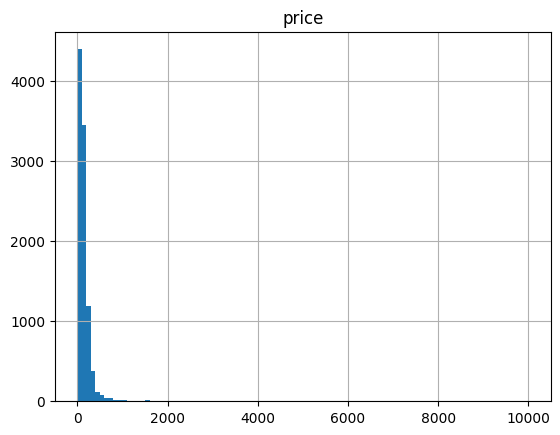

In [ ]:
y_train.hist(bins=100)
y_test.hist(bins=100)

In [ ]:
import numpy as np

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

* 로그를 씌워서 대칭성을 회복시킨다

array([[<Axes: title={'center': 'price'}>]], dtype=object)

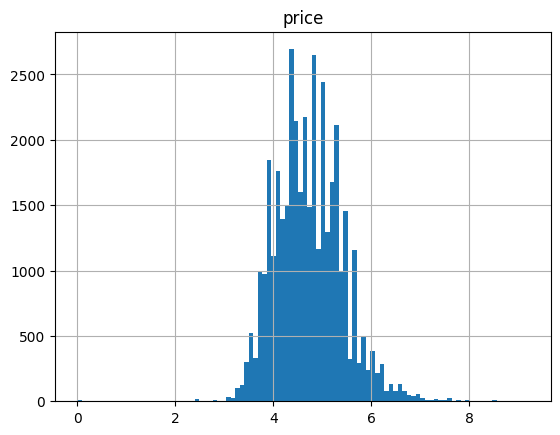

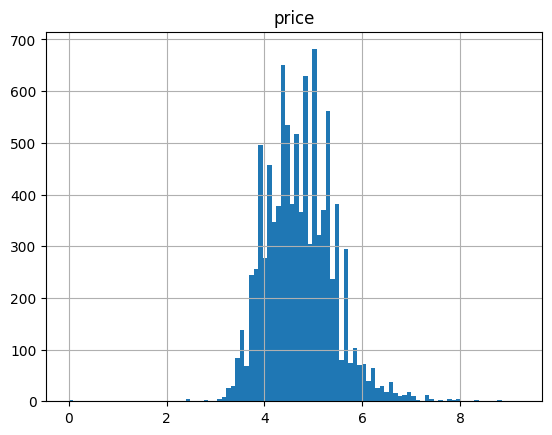

In [ ]:
y_train.hist(bins=100)
y_test.hist(bins=100)

## 모델은 라쏘 모델과 랜덤포레스트, xgboost를 활용

* 라쏘

In [ ]:
params={'alpha':[0.001, 0.01,0.1,0.5,1,1.5]}

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model = Lasso()
grid = GridSearchCV(model, params, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 1.5]})

In [ ]:
grid.best_params_

{'alpha': 0.001}

In [ ]:
from sklearn.metrics import mean_squared_error

best_model = Lasso(alpha=0.001)
best_model.fit(x_train, y_train)
Lasso_pred = best_model.predict(x_test)

# 에러 검사시 다시 로그를 풀어서 비교한다.
mean_squared_error(np.expm1(y_test), np.expm1(Lasso_pred))

49975.393897224414

* 규제의 강도가 낮을수록 좋다

* 랜덤 포레스트

In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, criterion='squared_error')
grid = GridSearchCV(model, params, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [ ]:
grid.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

* 맥스 뎁스 제한하지 않는 것이 좋다

In [ ]:
best_model = RandomForestRegressor(n_estimators=400, random_state=1, criterion='squared_error')
best_model.fit(x_train,y_train)
Random_pred = best_model.predict(x_test)

# 에러 검사시 다시 로그를 풀어서 비교한다.
mean_squared_error(np.expm1(y_test), np.expm1(Random_pred))

<ipython-input-40-de1b5f579cfc>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_train,y_train)


45093.603222299076

In [ ]:
params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],

}

from xgboost import XGBRegressor
model = XGBRegressor()
grid = GridSearchCV(model, params, cv=5, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'subsample': 1.0}

In [ ]:
from xgboost import XGBRegressor
best_model = XGBRegressor(
learning_rate= 0.1,
max_depth= 10,
n_estimators= 200,
)

best_model.fit(x_train, y_train)
XGB_pred = best_model.predict(x_test)

# 에러 검사시 다시 로그를 풀어서 비교한다.
mean_squared_error(np.expm1(y_test), np.expm1(XGB_pred))
#45144.254457925235
#44974.142588646915
#44405.86546882087

44405.86546882087

# 총평
* 애초에 scaler와 원핫인코딩+SVD를 사용해서 그런가, 오히려 하이퍼 파라미터를 주는 것이 정확도가 많이 떨어지는 것으로 보인다.

* 실제로 원핫인코딩만 해서 진행한 것이 정확도가 더 높은 것으로 판단되나 모델 자체가 너무 느려진다는 단점이 보여 SVD로 차원축소를 진행하여 모델의 속도를 올렸다.